# Loading Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading File

In [4]:
raw_data = pd.read_csv(r'../data/data_jobs_salary_all.csv')

In [5]:
raw_data.shape

(32672, 16)

In [40]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22036 entries, 0 to 32671
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_title_short        22036 non-null  object 
 1   job_title              22036 non-null  object 
 2   job_location           21756 non-null  object 
 3   job_via                22036 non-null  object 
 4   job_schedule_type      22021 non-null  object 
 5   job_work_from_home     22036 non-null  bool   
 6   search_location        22036 non-null  object 
 7   job_posted_date        22036 non-null  object 
 8   job_no_degree_mention  22036 non-null  bool   
 9   job_health_insurance   22036 non-null  bool   
 10  job_country            22036 non-null  object 
 11  salary_rate            22036 non-null  object 
 12  salary_year_avg        22036 non-null  float64
 13  salary_hour_avg        0 non-null      float64
 14  company_name           22036 non-null  object 
 15  job_ski

In [41]:
raw_data.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills
0,Senior Data Scientist,Senior Data Scientist Data and Analytics Perfo...,"Bennington, NE",via ZipRecruiter,Full-time,False,Sudan,2023-04-24 09:51:15,False,True,Sudan,year,128050.0,NaN,Cox Communications,"['sql', 'python', 'aws', 'pyspark', 'tableau',..."
1,Data Engineer,Data Engineer - MA,"Mesa, AZ",via Indeed,Full-time,False,Georgia,2023-03-13 12:51:23,True,True,United States,year,140000.0,NaN,Worldgate LLC,"['sql', 'nosql', 'java', 'python', 'kafka', 's..."
2,Senior Data Analyst,Supervisory Information Technology Specialist ...,"Alexandria, VA",via ZipRecruiter,Full-time,False,"New York, United States",2023-07-05 07:03:38,True,False,United States,year,156000.0,NaN,National Technical Information Service,NaN
3,Machine Learning Engineer,Machine Learning Research Scientist,"Pittsburgh, PA",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-13 16:05:41,False,True,United States,year,140000.0,NaN,Bosch Group,"['pytorch', 'tensorflow']"
6,Data Engineer,Sr. Data Engineer (remote),Anywhere,via Indeed,Full-time,True,"Texas, United States",2023-10-26 19:07:59,False,True,United States,year,135000.0,NaN,MultiPlan Inc.,"['python', 'java', 'sql', 'nosql', 'mongodb', ..."


# Data Cleaning & Analysis

In [6]:
raw_data.dropna(subset=['salary_year_avg'], inplace = True)

In [19]:
mean_salary = raw_data.groupby('job_title_short')['salary_year_avg'].agg(['mean']).sort_values(by='mean', ascending = False)

In [6]:
mean_salary_from_home = raw_data[raw_data['job_work_from_home'] == True].groupby('job_title_short')['salary_year_avg'].agg(['mean']).sort_values(by='mean', ascending = False)
mean_salary_from_home

,mean
job_title_short,
Senior Data Scientist,163356.419643
Machine Learning Engineer,148852.809524
Senior Data Engineer,148337.610508
Cloud Engineer,147111.111111
Data Scientist,143949.785198
Data Engineer,132109.699458
Software Engineer,123006.793651
Senior Data Analyst,113156.951012
Business Analyst,97113.833333


In [7]:
mean_salary_not_from_home = raw_data[raw_data['job_work_from_home'] == False].groupby('job_title_short')['salary_year_avg'].agg(['mean']).sort_values(by='mean', ascending = False)
mean_salary_not_from_home

,mean
job_title_short,
Senior Data Scientist,151788.805104
Senior Data Engineer,145537.436616
Data Scientist,134303.437301
Data Engineer,129706.237508
Machine Learning Engineer,125216.112570
Senior Data Analyst,113931.600407
Software Engineer,111792.593924
Cloud Engineer,105508.026786
Data Analyst,93712.732311


In [179]:
raw_data.dropna(subset=['job_skills'], inplace = True)

In [135]:
skills = []
def append_skills(s):
        for skill in s.strip("][").replace("'", "").replace(" ", "").split(','):
            skills.append(skill)
raw_data[raw_data['job_title_short'] == 'Data Analyst']['job_skills'].apply(append_skills)

14       None
34       None
81       None
127      None
154      None
         ... 
32646    None
32648    None
32650    None
32653    None
32664    None
Name: job_skills, Length: 4879, dtype: object

In [140]:
skill_df = pd.DataFrame(skills, columns=['skills'])
top5_skills = skill_df.groupby('skills')['skills'].value_counts().sort_values(ascending=False).head(5)
top5_skills = top5_skills.sort_values()
top5_skills.index = top5_skills.index.str.capitalize()
top5_skills

skills
R          1082
Tableau    1669
Python     1851
Excel      2152
Sql        3112
Name: count, dtype: int64

In [242]:
degree_mentioned = raw_data.groupby('job_no_degree_mention')['salary_year_avg'].mean()
degree_mentioned.index = ['Degree Mentioned', 'No Degree Mentioned']
degree_mentioned

Degree Mentioned       125148.422123
No Degree Mentioned    114862.673663
Name: salary_year_avg, dtype: float64

In [288]:
countries = raw_data.groupby('job_country')['salary_year_avg'].agg(['mean', 'count'])
reliable_countries = countries[countries['count'] > 50].sort_values(by='mean', ascending=False)
reliable_countries = reliable_countries.drop('Sudan', axis=0)
top5_countries = reliable_countries.head()
top5_countries = top5_countries.sort_values(by='mean')
top5_countries

,mean,count
job_country,,
Portugal,118276.487288,118
Australia,119370.250000,74
Ireland,122307.303922,51
Canada,123835.496560,436
United States,126150.710763,14347


# Visualization

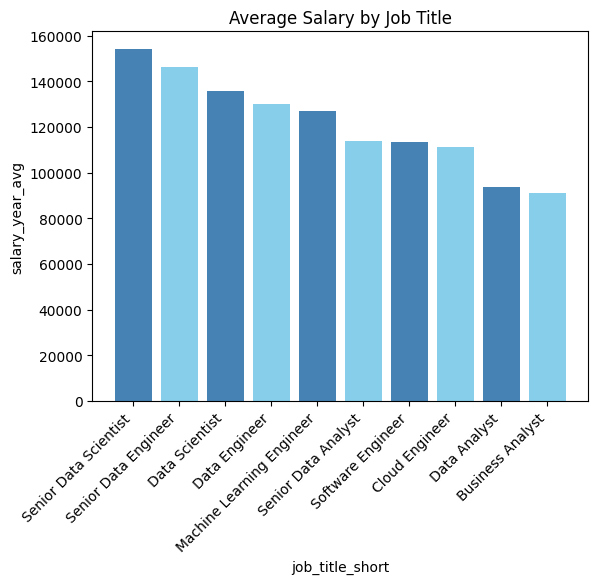

In [305]:
plt.bar(height = mean_salary['mean'],
        x = mean_salary.index,
       color = ['steelblue', 'skyblue'])
plt.xticks(rotation=45, ha = 'right')
plt.title('Average Salary by Job Title')
plt.xlabel('job_title_short')
plt.ylabel('salary_year_avg')
plt.show()

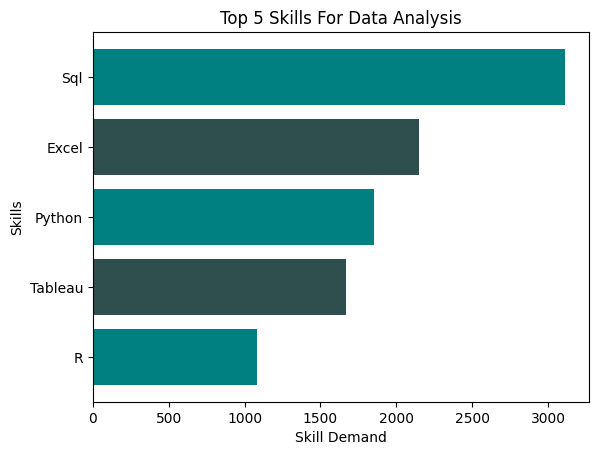

In [303]:
plt.barh(y = top5_skills.index, width = top5_skills.values,
        color = ['teal', 'darkslategrey'])
plt.title('Top 5 Skills For Data Analysis')
plt.xlabel('Skill Demand')
plt.ylabel('Skills')
plt.show()

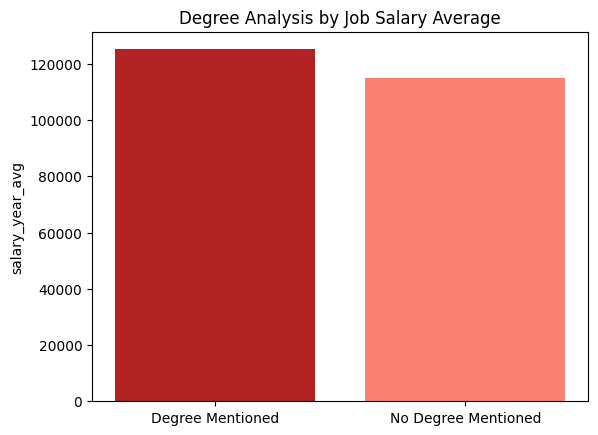

In [252]:
degree_mentioned

plt.bar(height = degree_mentioned.values,
        x = degree_mentioned.index, color = ['firebrick', 'salmon'])
plt.title('Degree Analysis by Job Salary Average')
plt.ylabel('salary_year_avg')
plt.show()

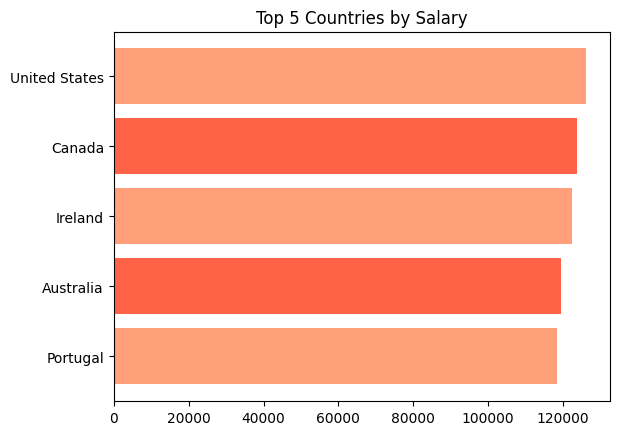

In [302]:
top5_countries
plt.barh(y = top5_countries.index, width=top5_countries['mean'],
         color = ['lightsalmon', 'tomato'])
plt.title('Top 5 Countries by Salary')
plt.show()

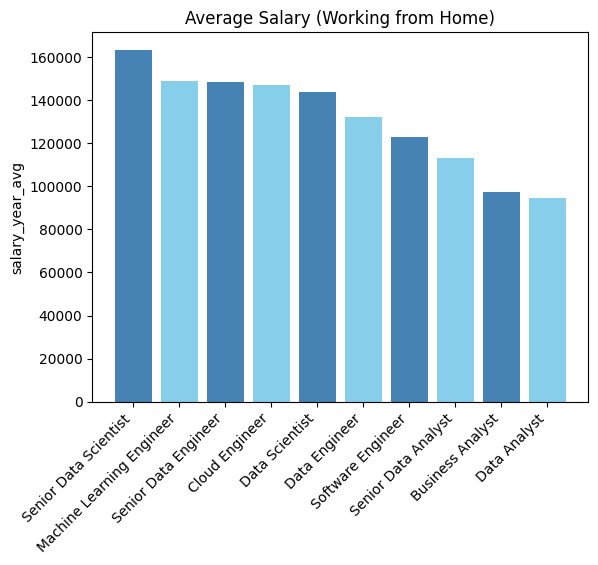

In [19]:
plt.bar(height = mean_salary_from_home['mean'],
        x = mean_salary_from_home.index, color = ['steelblue', 'skyblue'])
plt.xticks(rotation=45, ha = 'right')
plt.title('Average Salary (Working from Home)')
plt.ylabel('salary_year_avg')
plt.show()

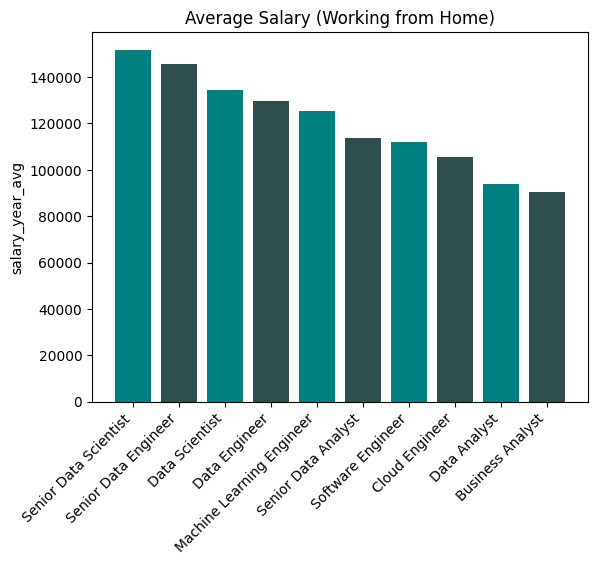

In [22]:
plt.bar(height = mean_salary_not_from_home['mean'],
        x = mean_salary_not_from_home.index, color = ['teal', 'darkslategrey'])
plt.xticks(rotation=45, ha = 'right')
plt.title('Average Salary (Working from Home)')
plt.ylabel('salary_year_avg')
plt.show()